# Stock Technical Analysis: Python Tutorial

Relative Strength Index (RSI)

Contact: andrewshamlet@gmail.com // @andrewshamlet

Python streamlines tasks requiring multiple steps in a single block of code. For this reason, it is a great tool for querying and performing analysis on data.

Last Tutorial, we outlined steps for calculating Price Channels.

In this Tutorial, we introduce a new technical indicator, the Relative Strenght Index (RSI).

The Relative Strength Index (RSI) is a momentum indicator developed by noted technical analyst Welles Wilder, that compares the magnitude of recent gains and losses over a specified time period to measure speed and change of price movements of a security. It is primarily used to identify overbought or oversold conditions in the trading of an asset.

The Relative Strength Index (RSI) is calculated as follows:
    
        RSI = 100 - 100 / (1 + RS)
        
        RS = Average gain of last 14 trading days / Average loss of last 14 trading days

RSI values range from 0 to 100. 

Traditional interpretation and usage of the RSI is that RSI values of 70 or above indicate that a security is becoming overbought or overvalued, and therefore may be primed for a trend reversal or corrective pullback in price. On the other side, an RSI reading of 30 or below is commonly interpreted as indicating an oversold or undervalued condition that may signal a trend change or corrective price reversal to the upside.

Let’s use Python to compute the Relative Strenght Index (RSI).

1.) Import modules (numpy included).

In [7]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

2.) Define function for querying daily close.

In [3]:
def get_stock(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Close']

3.) Define function for RSI.

In [8]:
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    rs = pd.stats.moments.ewma(u, com=period-1, adjust=False) / \
         pd.stats.moments.ewma(d, com=period-1, adjust=False)
    return 100 - 100 / (1 + rs)

How does the RSI function work?

3.a.) Function creates two series of daily differences.

In [ ]:
#delta = series.diff().dropna()
#u = delta * 0
#d = u.copy()

3.b.) One series is daily positive differences, i.e. gains.       

In [ ]:
#u[delta > 0] = delta[delta > 0]

3.c.) One series is daily negative difference, i.e. losses.

In [ ]:
#d[delta < 0] = -delta[delta < 0]

3.d.) Average daily positive differences for the period specified. 

In [ ]:
#u[u.index[period-1]] = np.mean( u[:period] )
#u = u.drop(u.index[:(period-1)])

3.e.) Average daily negative difference for the period specified. 

In [ ]:
#d[d.index[period-1]] = np.mean( d[:period] )
#d = d.drop(d.index[:(period-1)])

3.f.) RS is set equal to Exponential Moving Average of daily positive differences for the period sepcified / Exponential Moving Average of daily positive differences for the period sepcified. 

In [ ]:
#rs = pd.stats.moments.ewma(u, com=period-1, adjust=False) / \
#         pd.stats.moments.ewma(d, com=period-1, adjust=False)

3.g) Return 100 - 100 / (1 + RS)

In [ ]:
#return 100 - 100 / (1 + rs)

4.) Query daily close for ‘FB’ during 2016.

In [ ]:
df = pd.DataFrame(get_stock('FB', '1/1/2016', '12/31/2016'))

5.) Run daily close through RSI function. Save series to new column in dataframe. 

In [12]:
df['RSI'] = RSI(df['Close'], 14)
df.tail()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=False,com=13).mean()


,Close,RSI
Date,,
2016-12-23,117.27,41.182061
2016-12-27,118.01,44.319340
2016-12-28,116.92,40.861998
2016-12-29,116.35,39.142390
2016-12-30,115.05,35.475549


6.) Plot daily close and RSI.

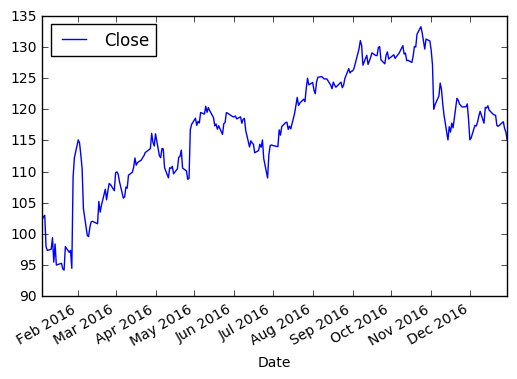

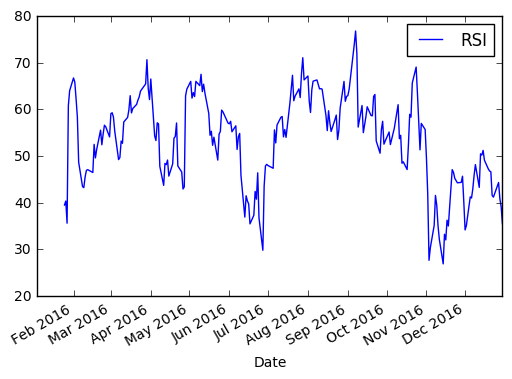

In [15]:
df.plot(y=['Close'])
df.plot(y=['RSI'])

There you have it! We created our RSI indicator. Here’s the full code:

In [14]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

def get_stock(stock,start,end):
     return web.DataReader(stock,'google',start,end)['Close']
    
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    rs = pd.stats.moments.ewma(u, com=period-1, adjust=False) / \
         pd.stats.moments.ewma(d, com=period-1, adjust=False)
    return 100 - 100 / (1 + rs)
    
df = pd.DataFrame(get_stock('FB', '1/1/2016', '12/31/2016'))
df['RSI'] = RSI(df['Close'], 14)
df.tail()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=False,com=13).mean()


,Close,RSI
Date,,
2016-12-23,117.27,41.182061
2016-12-27,118.01,44.319340
2016-12-28,116.92,40.861998
2016-12-29,116.35,39.142390
2016-12-30,115.05,35.475549
